<a href="https://colab.research.google.com/github/csva99/Deeplearning/blob/main/Billboard_Top_Songs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Billboard Top Songs 🎶**

# **📌 Contexto:**
\

Este conjunto de datos contiene 5000 canciones y combina datos reales de las listas de Spotify con entradas sintéticas para crear una mezcla diversa de géneros, artistas y atributos. Diseñado para modelos de aprendizaje automático, ayuda a predecir la posición máxima de una canción en las listas basándose en métricas musicales y de popularidad clave.



# **Descripción de los datos**:

\

- Song: Título de la pista

- Artist: Nombre del intérprete/banda

- Streams: Número total de transmisiones (duración)

- Daily Streams: Transmisiones por día
- Genre: Género musical (Pop, Hip-Hop, Rock, etc.)

- Release Year: Año en que se lanzó la canción

- Peak Position: Puesto más alto alcanzado en las listas Billboard/Spotify
- Weeks on Chart: Total de semanas pasadas en el gráfico

- Lyrics Sentiment: Análisis de sentimiento de las letras (de -1 a +1)

- TikTok Virality: Puntuación de popularidad basada en las tendencias de TikTok (0-100)

- Danceability: Qué tan bailable es la canción (0-1)

- Acousticness: Nivel de elementos acústicos (0-1)

- Energy: Nivel general de energía de la canción (0-1)


In [3]:
#Importamos todas las herramientas y bibliotecas necesarias para el modelo
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
url = 'https://raw.githubusercontent.com/csva99/Deeplearning/refs/heads/main/music_dataset.csv'
df = pd.read_csv(url)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import MeanAbsoluteError, MeanAbsolutePercentageError



#Preparamos los datos


*   Analizamos, limpiamos y transformamos los datos



In [4]:
print(df.head(10)) #Utilizamos head para validar que los datos cargaron bien y dar un primer vistazo sobre la organizacion de nuestros datos

          Song             Artist    Streams  Daily Streams       Genre  \
0  Track 14728           EchoSync  689815326         796199        Trap   
1  Track 21319  The Midnight Howl  457954557        2426710  Electronic   
2  Track 22152    Retro Resonance  217316865        1639915      Reggae   
3  Track 80217     Urban Rhapsody  312747634        3614532         Pop   
4  Track 77204       Sofia Carter  726442597        1028518       Blues   
5  Track 70018       ElectroPulse  581795174        3849348       Latin   
6   Track 1413   Firefly Symphony  292322745        4873492   Synthwave   
7  Track 53360     Urban Rhapsody  733665983        1185813      Techno   
8  Track 78739       Samantha Lee  651134032         410722         EDM   
9  Track 43458        Neon Vortex  228493924         110812         Pop   

   Release Year  Peak Position  Weeks on Chart  Lyrics Sentiment  \
0          2021             81               8              0.20   
1          2018             44        

In [5]:
print(df.info()) #Analizamos la informacion y tipo de los datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4850 entries, 0 to 4849
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Song              4850 non-null   object 
 1   Artist            4850 non-null   object 
 2   Streams           4850 non-null   int64  
 3   Daily Streams     4850 non-null   int64  
 4   Genre             4850 non-null   object 
 5   Release Year      4850 non-null   int64  
 6   Peak Position     4850 non-null   int64  
 7   Weeks on Chart    4850 non-null   int64  
 8   Lyrics Sentiment  4850 non-null   float64
 9   TikTok Virality   4850 non-null   int64  
 10  Danceability      4850 non-null   float64
 11  Acousticness      4850 non-null   float64
 12  Energy            4850 non-null   float64
dtypes: float64(4), int64(6), object(3)
memory usage: 492.7+ KB
None


In [6]:
print(df.describe()) #Utilizamos describe para entender la distribucion de nuestros datos, detectar outliers y ver mas datos estadisticos

            Streams  Daily Streams  Release Year  Peak Position  \
count  4.850000e+03   4.850000e+03   4850.000000    4850.000000   
mean   3.970579e+08   2.493418e+06   2007.725773      51.425773   
std    2.307764e+08   1.457542e+06     10.341312      28.909270   
min    1.130883e+06   1.158000e+04   1990.000000       1.000000   
25%    1.982039e+08   1.209343e+06   1999.000000      27.000000   
50%    3.929179e+08   2.486103e+06   2008.000000      51.000000   
75%    5.978880e+08   3.781338e+06   2017.000000      76.000000   
max    7.999510e+08   4.999643e+06   2025.000000     100.000000   

       Weeks on Chart  Lyrics Sentiment  TikTok Virality  Danceability  \
count     4850.000000       4850.000000      4850.000000   4850.000000   
mean        52.280000          0.000478        50.776495      0.555280   
std         29.472456          0.574915        29.325179      0.260619   
min          1.000000         -1.000000         0.000000      0.100000   
25%         27.000000     

In [7]:
for col in df.columns:
    print(f"{col}:{df[col].unique()}") #Con esta funcion revisamos los datos unicos en cada una de las columnas, para ver si hay datos con problemas

Song:['Track 14728' 'Track 21319' 'Track 22152' ... 'Track 61735' 'Track 47314'
 'Track 30934']
Artist:['EchoSync' 'The Midnight Howl' 'Retro Resonance' 'Urban Rhapsody'
 'Sofia Carter' 'ElectroPulse' 'Firefly Symphony' 'Samantha Lee'
 'Neon Vortex' 'Liam Harper' 'Jay Zenith' 'Shadow Beats' 'Bass Surge'
 'Aurora Soundwave' 'DJ Thunder' 'Horizon Flow' 'Ava & The Ocean'
 'Crimson Echo' 'Celestial Harmony' 'Luna Nova']
Streams:[689815326 457954557 217316865 ... 590393937 376858259 262207213]
Daily Streams:[ 796199 2426710 1639915 ... 1474438 1933465 2419058]
Genre:['Trap' 'Electronic' 'Reggae' 'Pop' 'Blues' 'Latin' 'Synthwave' 'Techno'
 'EDM' 'Jazz' 'Punk' 'Rock' 'House' 'Folk' 'Hip-Hop' 'Country' 'Lo-Fi'
 'Metal' 'K-Pop' 'Indie' 'Drum & Bass' 'R&B']
Release Year:[2021 2018 1992 2000 2001 2025 1991 2014 2007 2022 1996 2002 2013 2024
 2020 2012 2023 1994 1990 2010 2011 2003 1998 1997 2015 2004 2006 2016
 2017 2009 1995 2019 1993 2008 2005 1999]
Peak Position:[ 81  44  57  21  97  76  70   

In [8]:
print(df.isnull().sum())#revisamos si hay datos faltantes

Song                0
Artist              0
Streams             0
Daily Streams       0
Genre               0
Release Year        0
Peak Position       0
Weeks on Chart      0
Lyrics Sentiment    0
TikTok Virality     0
Danceability        0
Acousticness        0
Energy              0
dtype: int64


In [9]:
print(df.duplicated().sum())#Revisamos si existen datos duplicados
df.drop_duplicates(inplace=True) # en caso de existencia de duplicados eliminamos las filas duplicadas y modificamos directamente el dataframe

0


In [10]:
Canciones = df['Song'].str.extract('(\d+)').fillna(0).astype(int)#Con esta funcion estamos extrayendo solamente los numeros de la columna Song ya que contiene texto + numero /d hace referencia a que solo extraeremos digitos
                                                                  # y + quiere decir que puede uno o mas digitos y se crea una nueva columna con ellos
df['Song_Number'] = Canciones
print(Canciones)

          0
0     14728
1     21319
2     22152
3     80217
4     77204
...     ...
4845  24875
4846   7493
4847  61735
4848  47314
4849  30934

[4850 rows x 1 columns]


In [11]:
Artistas = df['Artist'] #Utilizamos LabelEncoder para transformar los Artistas a etiquetas numericas, LabelEncoder selecciona los elementos unicos de la columna Artist y les asigna un valor numerico para luego guardalos en una columna nueva que los contenga
le = LabelEncoder()
df['Artist_Encoded'] = le.fit_transform(Artistas)
print(df['Artist_Encoded'])

0        6
1       18
2       14
3       19
4       17
        ..
4845     0
4846    15
4847    14
4848     2
4849    16
Name: Artist_Encoded, Length: 4850, dtype: int64


In [12]:
Generos = df['Genre'] #Repetimos el mismo proceso de la columna Artist para la columna Genre
le = LabelEncoder()
df['Genre_Encoded'] = le.fit_transform(Generos)
print(df['Genre_Encoded'])

0       21
1        4
2       17
3       14
4        0
        ..
4845     8
4846    13
4847    10
4848    11
4849     0
Name: Genre_Encoded, Length: 4850, dtype: int64


#Empezamos con la creación del modelo.


*   Creamos el modelo, ajustamos hiperparámetros para potenciar el aprendizaje  de la red neuronal
*   Entrenamos el modelo
*   Analizamos los resultados






In [13]:
#Ahora terminamos de preparar los datos para entrenar el modelo definiendo las columnas de entrada y salida
Columnas = ['Song_Number','Artist_Encoded','Streams','Daily Streams','Genre_Encoded','Release Year','Peak Position','Weeks on Chart','Lyrics Sentiment','TikTok Virality','Danceability','Acousticness','Energy']
x = df[Columnas] #Corresponden a los datos que utilizaremos para predecir
y = df['Peak Position'] #Corresponde al dato que queremos predecir

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) #Saparamos los datos en 80% para entrenamiento y 20% para prueba, esto para evitar overfitting y que el modelo aprenda los datos de memoria.
#Ya que si el modelo aprende y evalua con el 100% de los datos tendrá muy buena precision con esos datos pero fallará muchísimo con datos nuevos.
#Se utiliza random_state=42 para que los datos no se dividan aleatoriamente y asi entrenar de mejor manera el modelo
scaler = StandardScaler()#Preparamos el scaler o normalizador
x_train = scaler.fit_transform(x_train)#Esta funcion (fit) calcula media y desviacion estandar para cada columna de los datos de entrenamiento, mientras que transform los transforma para que todos los datos enten dentro dle mismo rango asi la red neuronal aprende a mayor velocidad
x_test = scaler.transform(x_test)#Aqui solo transformamos los datos y que se usan las medias y desviacion aprendidas en el paso anterior

model = Sequential([
    Dense(128, activation='relu', input_shape=(x_train.shape[1],)),#Utilizamos Relu como funcion de activacion ya que es la que mejor se ajusta a nuestro modelo de regresion
    Dropout(0.27),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(32, activation='relu'),
    Dense(1)
]) #Configuramos el modelo y ajustamos dropuot para prevenir el overfitting

optimizer = Adam(learning_rate=0.001)#Utilizamos adam como optimizador ya que es un algoritmo muy util para ajustar los pesos y para que el modelo aprenda de manera mas rapida
model.compile(
    optimizer=optimizer,
    loss='mean_squared_error',#Utilizamos mean squared error ya que penaliza los errores grandes lo cual es perfecto para modelos de regresión
    metrics=[
        MeanAbsoluteError(),# MAE
        MeanAbsolutePercentageError()# MAPE
    ]
)

#Entrenamos el modelo
history = model.fit(x_train, y_train, epochs=60, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/60


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


122/122 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 3331.4788 - mean_absolute_error: 50.5740 - mean_absolute_percentage_error: 102.6861 - val_loss: 1606.3893 - val_mean_absolute_error: 36.8791 - val_mean_absolute_percentage_error: 86.2269
Epoch 2/60
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 713.7018 - mean_absolute_error: 23.0422 - mean_absolute_percentage_error: 61.3246 - val_loss: 176.6444 - val_mean_absolute_error: 12.1211 - val_mean_absolute_percentage_error: 37.6228
Epoch 3/60
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 180.1814 - mean_absolute_error: 10.6962 - mean_absolute_percentage_error: 38.6664 - val_loss: 87.7243 - val_mean_absolute_error: 8.5101 - val_mean_absolute_percentage_error: 35.7053
Epoch 4/60
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 141.5941 - mean_absolute_error: 9.2579 - mean_absolute_percentage_error: 36.1640 - val_loss: 21.1972 - val_mean_absolute_error: 3.6476 - val_mean_absolute_percentage_error: 30.2993
Epoch 5/60
122/122 ━━━━━━━━━━━━━━━━━

In [36]:
y_pred = model.predict(x_test)
model.evaluate(x_test, y_test)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4803 - mean_absolute_error: 0.9446 - mean_absolute_percentage_error: 5.3865


[1.4824596643447876, 0.9500868320465088, 5.2507734298706055]

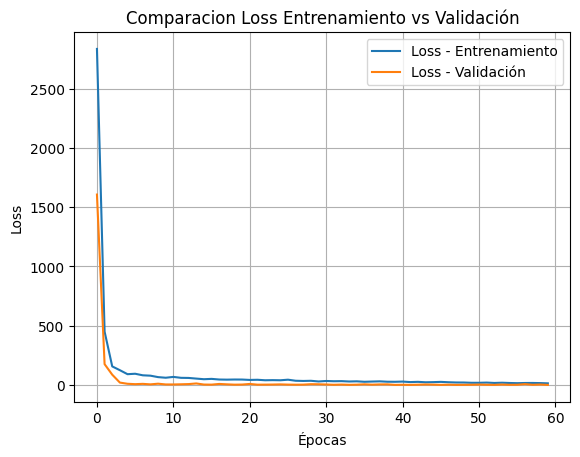

In [37]:
plt.plot(history.history['loss'], label='Loss - Entrenamiento')
plt.plot(history.history['val_loss'], label='Loss - Validación')
plt.title('Comparacion Loss Entrenamiento vs Validación')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

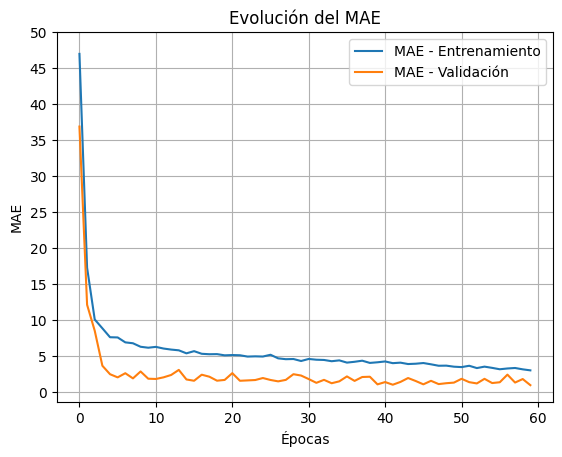

In [38]:
plt.plot(history.history['mean_absolute_error'], label='MAE - Entrenamiento')
plt.plot(history.history['val_mean_absolute_error'], label='MAE - Validación')
plt.title('Evolución del MAE')
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.yticks(np.arange(0, 55, 5))
plt.legend()
plt.grid()
plt.show()

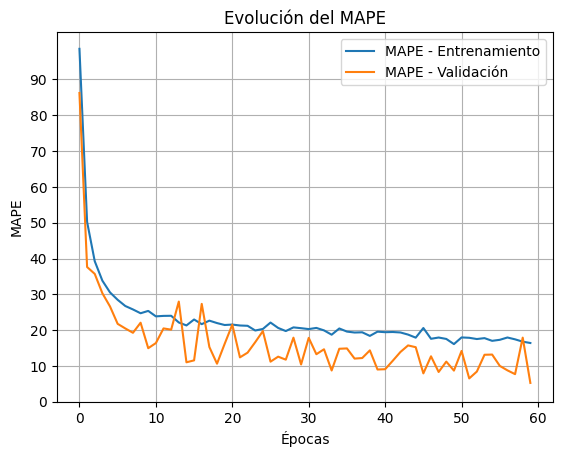

In [39]:
plt.plot(history.history['mean_absolute_percentage_error'], label='MAPE - Entrenamiento')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='MAPE - Validación')
plt.title('Evolución del MAPE')
plt.xlabel('Épocas')
plt.ylabel('MAPE')
plt.yticks(np.arange(0, 100, 10))
plt.legend()
plt.grid()
plt.show()

In [40]:
y_pred = model.predict(x_test).flatten()

# Mostrar algunas predicciones y valores reales
for real, pred in zip(y_test[:10], y_pred[:10]):
    print(f'Real: {real}, Predicho: {pred:.2f}')

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Real: 90, Predicho: 88.90
Real: 35, Predicho: 34.91
Real: 12, Predicho: 9.83
Real: 73, Predicho: 73.47
Real: 39, Predicho: 39.18
Real: 73, Predicho: 73.67
Real: 53, Predicho: 54.70
Real: 49, Predicho: 51.09
Real: 86, Predicho: 85.63
Real: 69, Predicho: 69.98


In [46]:
#Modelo sin dropout
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
modelo2 = Sequential([
    Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(32, activation='relu'),
    Dense(1)
])

optimizer = Adam(learning_rate=0.002)
modelo2.compile(
    optimizer=optimizer,
    loss='mean_squared_error',
    metrics=[
        MeanAbsoluteError(),
        MeanAbsolutePercentageError()
    ]
)

history = model.fit(x_train, y_train, epochs=70, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/70
 14/122 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.7116 - mean_absolute_error: 1.6872 - mean_absolute_percentage_error: 7.6717 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.8346 - mean_absolute_error: 1.7155 - mean_absolute_percentage_error: 8.8248 - val_loss: 1.5244 - val_mean_absolute_error: 1.0239 - val_mean_absolute_percentage_error: 9.1520
Epoch 2/70
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.0762 - mean_absolute_error: 1.5836 - mean_absolute_percentage_error: 8.6563 - val_loss: 0.7630 - val_mean_absolute_error: 0.7079 - val_mean_absolute_percentage_error: 3.1340
Epoch 3/70
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.1925 - mean_absolute_error: 1.5954 - mean_absolute_percentage_error: 9.3527 - val_loss: 0.8343 - val_mean_absolute_error: 0.7504 - val_mean_absolute_percentage_error: 4.3020
Epoch 4/70
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.0027 - mean_absolute_error: 1.5904 - mean_absolute_percentage_error: 7.6182 - val_loss: 0.5279 - val_mean_absolute_error: 0.5798 - val_mean_absolute_percentage_error: 3.1530
Epoch 5/70
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.2125 

In [42]:
y_pred = modelo2.predict(x_test)
modelo2.evaluate(x_test, y_test)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3538.7715 - mean_absolute_error: 51.6456 - mean_absolute_percentage_error: 100.1777


[3407.266357421875, 50.468204498291016, 100.16083526611328]

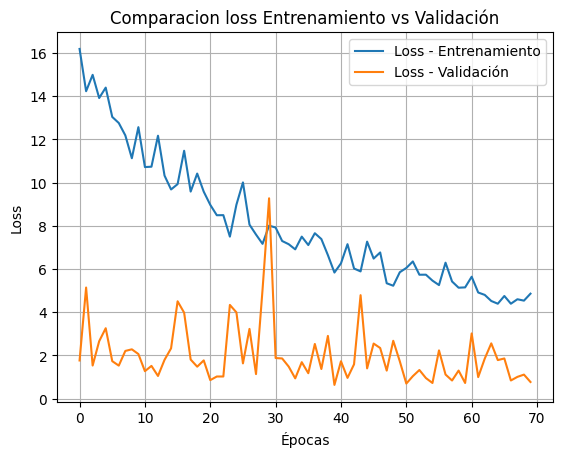

In [43]:
plt.plot(history.history['loss'], label='Loss - Entrenamiento')
plt.plot(history.history['val_loss'], label='Loss - Validación')
plt.title('Comparacion loss Entrenamiento vs Validación')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

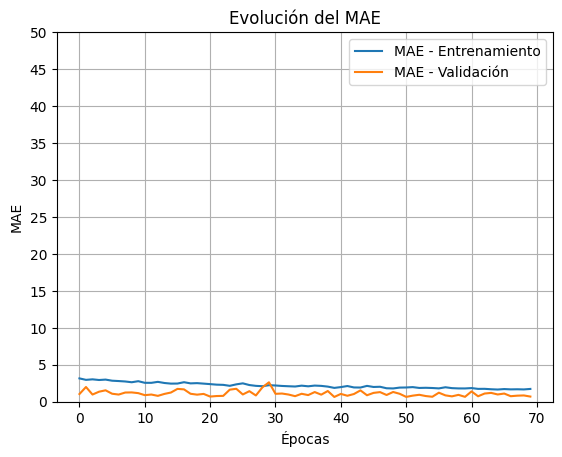

In [44]:
plt.plot(history.history['mean_absolute_error'], label='MAE - Entrenamiento')
plt.plot(history.history['val_mean_absolute_error'], label='MAE - Validación')
plt.title('Evolución del MAE')
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.yticks(np.arange(0, 55, 5))
plt.legend()
plt.grid()
plt.show()

In [45]:
y_pred = modelo2.predict(x_test).flatten()

# Mostrar algunas predicciones y valores reales
for real, pred in zip(y_test[:10], y_pred[:10]):
    print(f'Real: {real}, Predicho: {pred:.2f}')

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Real: 90, Predicho: 0.04
Real: 35, Predicho: -0.04
Real: 12, Predicho: -0.01
Real: 73, Predicho: -0.05
Real: 39, Predicho: -0.00
Real: 73, Predicho: -0.06
Real: 53, Predicho: -0.00
Real: 49, Predicho: 0.06
Real: 86, Predicho: -0.00
Real: 69, Predicho: -0.16
